<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [112]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [113]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [114]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-10-09 17:23:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 9.51M=0.002s

2022-10-09 17:23:03 (9.51 MB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File


In [115]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [116]:
df.shape

(346, 10)

### Convert to date time object


In [117]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [118]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [119]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn --quiet

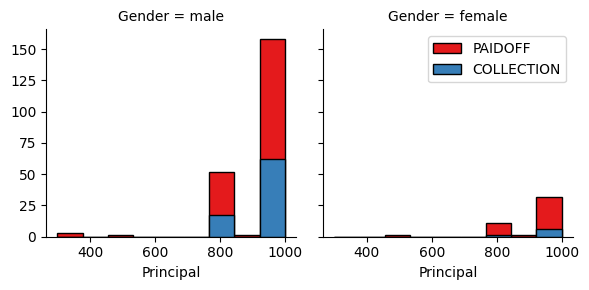

In [120]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

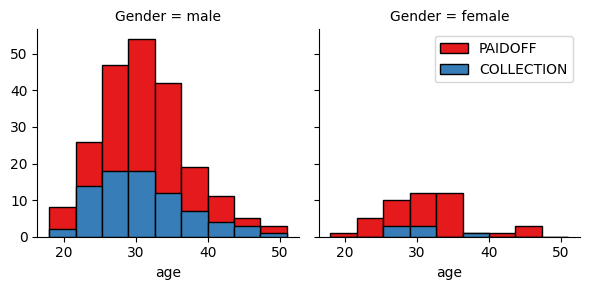

In [121]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


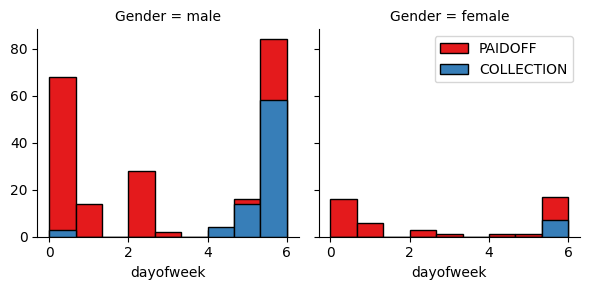

In [122]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [123]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [124]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF       86.54%
        COLLECTION    13.46%
male    PAIDOFF       73.13%
        COLLECTION    26.87%
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [125]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [126]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF       75.00%
                      COLLECTION    25.00%
High School or Below  PAIDOFF       74.17%
                      COLLECTION    25.83%
Master or Above       COLLECTION    50.00%
                      PAIDOFF       50.00%
college               PAIDOFF       76.51%
                      COLLECTION    23.49%
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [127]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [128]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [129]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [130]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [131]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [132]:
#split the data into train test split for better training 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,   
                                                                                                          random_state=1)
print(f"train sample size: {X_train.shape[0]} | train features: {X_train.shape[1]} | train labels: {len(y_train)}")
print(f"test sample size: {X_test.shape[0]} | test features: {X_test.shape[1]} | test labels: {len(y_test)}")

train sample size: 276 | train features: 8 | train labels: 276
test sample size: 70 | test features: 8 | test labels: 70


In [133]:
#find the best k (neighbors for knn model)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

accuracy_scores = [] 
#try different ks and see which one is best for the model
for k in range(1, 10):

  train_knn_model = KNeighborsClassifier(n_neighbors=k)
  train_knn_model.fit(X_train, y_train)
  train_knn_pred = train_knn_model.predict(X_test)

  train_knn_acc = accuracy_score(y_test, train_knn_pred)

  accuracy_scores.append(train_knn_acc)

#get the best k and accuracy 
knn_best_k = np.argmax(accuracy_scores) + 1
knn_best_acc = np.max(accuracy_scores)

#list accuracy for each k 
for k_idx, k_acc in enumerate(accuracy_scores):
  print(f"k: {k_idx + 1} | score: {k_acc * 100:.2f}%")

print(f"best k for knn model: {knn_best_k} | with accuracy of: {knn_best_acc * 100:.2f}%")


k: 1 | score: 58.57%
k: 2 | score: 61.43%
k: 3 | score: 67.14%
k: 4 | score: 68.57%
k: 5 | score: 74.29%
k: 6 | score: 71.43%
k: 7 | score: 75.71%
k: 8 | score: 72.86%
k: 9 | score: 74.29%
best k for knn model: 7 | with accuracy of: 75.71%


In [134]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score

#train model on best k
trained_knn_model = KNeighborsClassifier(n_neighbors=7)
trained_knn_model.fit(X_train, y_train)

trained_knn_pred = trained_knn_model.predict(X_test)


print(f"accuarcy score: {accuracy_score(y_test, trained_knn_pred) * 100:.2f}%")
print(f"jaccard_score score: {jaccard_score(y_test, trained_knn_pred, average='weighted') * 100:.2f}%")
print(f"f1 score: {jaccard_score(y_test, trained_knn_pred, average='weighted') * 100:.2f}%")

accuarcy score: 75.71%
jaccard_score score: 60.70%
f1 score: 60.70%


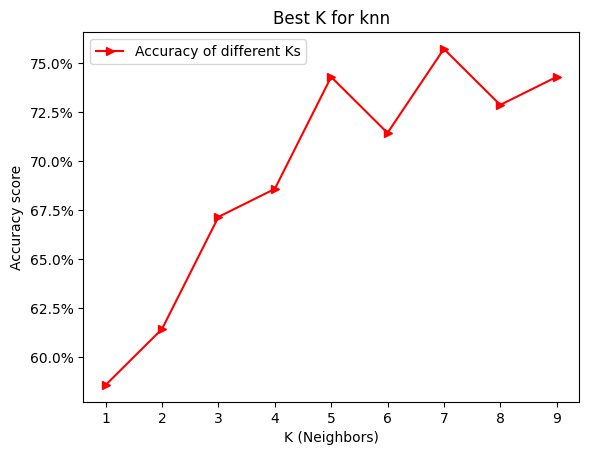

In [135]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#visual of the neighbors
plt.plot(range(1, 10), accuracy_scores, marker='>', c='r')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel("K (Neighbors)")
plt.ylabel("Accuracy score")
plt.legend(["Accuracy of different Ks"])
plt.title("Best K for knn");

# Decision Tree


In [136]:
#split the data into train test split for better training 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,   
                                                                                                          random_state=1)
print(f"train sample size: {X_train.shape[0]} | train features: {X_train.shape[1]} | train labels: {len(y_train)}")
print(f"test sample size: {X_test.shape[0]} | test features: {X_test.shape[1]} | test labels: {len(y_test)}")

train sample size: 276 | train features: 8 | train labels: 276
test sample size: 70 | test features: 8 | test labels: 70


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score

trained_decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=4)
trained_decision_tree.fit(X_train, y_train)

trained_decision_tree_pred = trained_decision_tree.predict(X_test)

trained_decision_tree_acc = accuracy_score(y_test, trained_decision_tree_pred)

print(f"decision tree accuracy: {trained_decision_tree_acc * 100:.2f}%")
print(f"f1 score: {f1_score(y_test, trained_decision_tree_pred, average='weighted') * 100:.2f}%")
print(f"jaccard score: {jaccard_score(y_test, trained_decision_tree_pred, average='weighted') * 100:.2f}%")

decision tree accuracy: 74.29%
f1 score: 63.33%
jaccard score: 55.18%


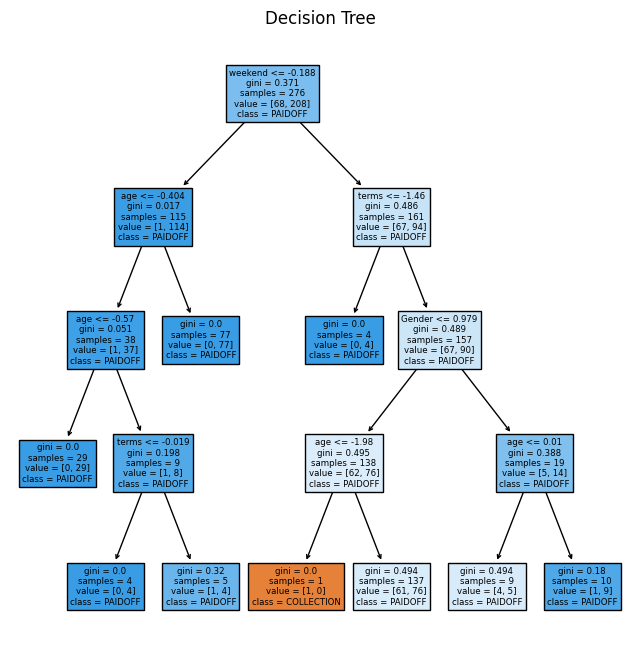

In [159]:
from sklearn import tree
import matplotlib.pyplot as plt

decision_tree_class_names = trained_decision_tree.classes_
decision_tree_labels = Feature.columns

plt.figure(figsize=(8, 8))
tree.plot_tree(trained_decision_tree, class_names=decision_tree_class_names, feature_names=decision_tree_labels, filled=True)
plt.title("Decision Tree");

# Support Vector Machine


In [139]:
#split the data into train test split for better training 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,   
                                                                                                          random_state=1)
print(f"train sample size: {X_train.shape[0]} | train features: {X_train.shape[1]} | train labels: {len(y_train)}")
print(f"test sample size: {X_test.shape[0]} | test features: {X_test.shape[1]} | test labels: {len(y_test)}")

train sample size: 276 | train features: 8 | train labels: 276
test sample size: 70 | test features: 8 | test labels: 70


In [140]:
from sklearn.svm import SVC

trained_svm = SVC(kernel="linear")
trained_svm.fit(X_train, y_train)

trained_svm_pred = trained_svm.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

print(f"accuracy score: {accuracy_score(y_test, trained_svm_pred) * 100:.2f}%")
print(f"jaccard score: {jaccard_score(y_test, trained_svm_pred, average='weighted') * 100:.2f}%")
print(f"f1 score: {f1_score(y_test, trained_svm_pred, average='weighted') * 100:.2f}%")

accuracy score: 74.29%
jaccard score: 55.18%
f1 score: 63.33%


# Logistic Regression


In [142]:
#split the data into train test split for better training 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,   
                                                                                                          random_state=1)
print(f"train sample size: {X_train.shape[0]} | train features: {X_train.shape[1]} | train labels: {len(y_train)}")
print(f"test sample size: {X_test.shape[0]} | test features: {X_test.shape[1]} | test labels: {len(y_test)}")

train sample size: 276 | train features: 8 | train labels: 276
test sample size: 70 | test features: 8 | test labels: 70


In [143]:
from sklearn.linear_model import LogisticRegression

trained_LR = LogisticRegression(solver="liblinear", C=0.0001)
trained_LR.fit(X_train, y_train)

trained_LR_pred = trained_LR.predict(X_test)
trained_LR_proba = trained_LR.predict_proba(X_test)

trained_LR_proba[:5], trained_LR_pred[:5]

(array([[0.50017124, 0.49982876],
        [0.49620574, 0.50379426],
        [0.50042228, 0.49957772],
        [0.50008922, 0.49991078],
        [0.49988653, 0.50011347]]),
 array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF'],
       dtype=object))

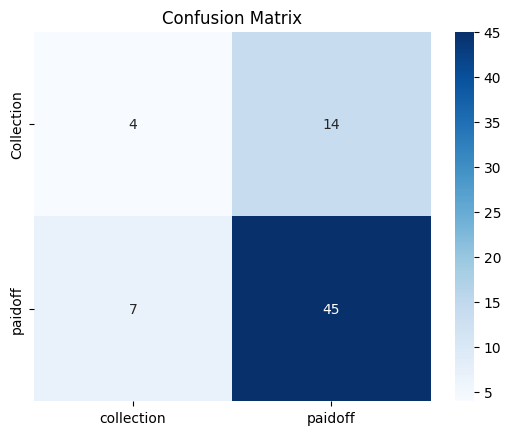

In [144]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns 

LR_cnf = confusion_matrix(y_test, trained_LR_pred)
LR_df = pd.DataFrame(LR_cnf, ["Collection", "paidoff"], ["collection", "paidoff"])
sns.heatmap(LR_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix");

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, trained_LR_pred))

              precision    recall  f1-score   support

  COLLECTION       0.36      0.22      0.28        18
     PAIDOFF       0.76      0.87      0.81        52

    accuracy                           0.70        70
   macro avg       0.56      0.54      0.54        70
weighted avg       0.66      0.70      0.67        70



In [146]:
from sklearn.metrics import log_loss, jaccard_score, f1_score

LR_jaccard = jaccard_score(y_test, trained_LR_pred, average="weighted")
LR_f1 = f1_score(y_test, trained_LR_pred, average="weighted")
LR_log_loss = log_loss(y_test, trained_LR_proba)


print(f"logistic regression jaccard score: {LR_jaccard * 100:.2f}%")
print(f"f1 score: {LR_f1 * 100:.2f}%")
print(f"logistic regression log loss: {LR_log_loss * 100:.2f}%")

logistic regression jaccard score: 54.76%
f1 score: 67.33%
logistic regression log loss: 69.09%


# Model Evaluation using Test set


First, download and load the test set:


In [147]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-10-09 17:23:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 2.61G=0s

2022-10-09 17:23:07 (2.61 GB/s) - 'loan_test.csv' saved [3642/3642]



### Load Test set for evaluation


In [148]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# Preprocessing test dataset 
  - will be preprocessing the test set the same way as the train set 

In [149]:
test_df["effective_date"] = pd.to_datetime(test_df["effective_date"])
test_df["dayofweek"] = test_df["effective_date"].dt.day_of_week
test_df["weekend"] = test_df["dayofweek"].apply(lambda x: 1 if(x>3) else 0)

In [150]:
test_df["Gender"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True)

In [151]:
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,10/7/2016,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,9/15/2016,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,10/9/2016,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,10/9/2016,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,9/25/2016,29,Bechalor,0,6,1


In [152]:
test_features = pd.concat([test_df[["Principal", "terms", "age", "Gender", "weekend"]], 
                                      pd.get_dummies(test_df["education"])], axis='columns')
test_features.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,1,0,0,1,0
2,1000,30,43,1,1,0,1,0,0
3,1000,30,26,0,1,0,0,0,1
4,800,15,29,0,1,1,0,0,0


In [153]:
test_features.drop(["Master or Above"], axis="columns", inplace=True)

In [154]:
test_labels = test_df["loan_status"].values
test_labels[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [155]:
test_X = preprocessing.StandardScaler().fit_transform(test_features)
test_X[:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

# Model Evaluation on Test set 

In [156]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [157]:

#use models trained on trainig data and test them on the test dataset 
test_knn_pred = trained_knn_model.predict(test_X)
test_decision_tree_pred = trained_decision_tree.predict(test_X)
test_svm_pred = trained_svm.predict(test_X)
test_LR_pred = trained_LR.predict(test_X)
test_LR_proba = trained_LR.predict_proba(test_X)

#store all tested models in list
test_pred = [test_knn_pred, test_decision_tree_pred, test_svm_pred, test_LR_pred, test_LR_proba]

#make lists of jaccard scores, f1 scores and log loss and evaluate all models 
test_jaccard = []
for test_j in test_pred:
  try: 
    test_jaccard.append(jaccard_score(test_labels, test_j, average="weighted"))
  except:
    continue

test_f1 = []
for test_f in test_pred:
  try:
    test_f1.append(f1_score(test_labels, test_f, average="weighted"))
  except:
    continue

test_Log_Loss = []
for test_ll in test_pred:
  try:
    test_Log_Loss.append(log_loss(test_labels, test_ll))
  except: 
    test_Log_Loss.append(np.nan)
if len(test_Log_Loss) > 4:
  test_Log_Loss.pop(0)

#check to see if evaluation metrics lists are saved 
print(f"jaccard scores: {test_jaccard}")
print(f"f1 scores: {test_f1}")
print(f"Log Loss: {test_Log_Loss}")


jaccard scores: [0.5102564102564102, 0.5775681341719078, 0.5486968449931412, 0.5175479462691203]
f1 scores: [0.6328400281888654, 0.6717642373556352, 0.6304176516942475, 0.626541384672668]
Log Loss: [nan, nan, nan, 0.6906389055618001]


In [158]:
#index for evaluation metrics dataframe 
algorithm = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]

#take lists made from evaluation metrics and create dict for making dataframe
scores = {"Jaccard": test_jaccard,
                           "F1-Score": test_f1,
                           "Log Loss": test_Log_Loss}

report_df = pd.DataFrame(scores, index=algorithm)
report_df.index.name = "Algorithm"

#convert float numbers to percentage 
pd.options.display.float_format = "{:.2%}".format

#display evaluation metrics on the test dataset 
report_df

,Jaccard,F1-Score,Log Loss
Algorithm,,,
KNN,51.03%,63.28%,NaN
Decision Tree,57.76%,67.18%,NaN
SVM,54.87%,63.04%,NaN
Logistic Regression,51.75%,62.65%,69.06%


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |
